# Mini Dollar Strategy - Data Analysis and Technical Indicators

This notebook demonstrates:
1. Loading market data
2. Exploratory data analysis
3. Technical indicators calculation
4. Pattern visualization

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from src.data.loaders.market_data import MarketDataLoader
from src.analysis.technical.strategy import TechnicalStrategy

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_palette('Set2')

## 1. Load and Prepare Market Data

In [2]:
# Initialize loader with explicit database path
loader = MarketDataLoader(db_path="../src/data/database/candles.db")

# Load last 6 months of data
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

# Carregando dados com intervalo de 5 minutos
data = loader.get_minute_data(
    interval=5,  # intervalo de 5 minutos
    start_date=start_date.strftime('%Y-%m-%d'),
    end_date=end_date.strftime('%Y-%m-%d')
)

print(f"Loaded {len(data)} candles")
data.head()

Loaded 13783 candles


c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:88: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['open'] = df['open'].resample(rule).first()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:89: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['high'] = df['high'].resample(rule).max()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:90: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['low'] = df['low'].resample(rule).min()
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\data\loaders\market_data.py:91: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data['close'] = df['clo

,open,high,low,close,volume
time,,,,,
2024-06-07 09:00:00,5378.261,5380.304,5372.643,5374.175,48438
2024-06-07 09:05:00,5374.686,5375.197,5367.536,5369.068,35648
2024-06-07 09:10:00,5368.557,5372.643,5368.047,5369.068,27432
2024-06-07 09:15:00,5369.579,5373.665,5368.557,5372.132,20180
2024-06-07 09:20:00,5372.643,5373.665,5370.090,5372.132,18400


### Data Quality Analysis

In [3]:
def analyze_data_quality(df):
    """Analyze data quality and print report."""
    print("Data Quality Report:\n")
    
    # Basic information
    print("1. Basic Information:")
    print(f"Total records: {len(df)}")
    print(f"Date range: {df.index.min()} to {df.index.max()}")
    print(f"Columns: {', '.join(df.columns)}\n")
    
    # Missing values
    print("2. Missing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found\n")
    
    # Data statistics
    print("3. Data Statistics:")
    print(df.describe())

# Run analysis
analyze_data_quality(data)

Data Quality Report:

1. Basic Information:
Total records: 13783
Date range: 2024-06-07 09:00:00 to 2024-11-29 18:25:00
Columns: open, high, low, close, volume

2. Missing Values:
No missing values found

3. Data Statistics:
               open          high           low         close         volume
count  13783.000000  13783.000000  13783.000000  13783.000000   13783.000000
mean    5661.354089   5664.473492   5658.328127   5661.400201   27380.701516
std      121.430872    121.769449    121.117294    121.407678   22291.916914
min     5368.557000   5372.643000   5363.961000   5369.068000     775.000000
25%     5558.723000   5561.316000   5555.679000   5558.723000   10915.000000
50%     5658.818000   5662.070000   5656.119000   5658.818000   20671.000000
75%     5745.632000   5748.559000   5742.612000   5745.632000   38342.000000
max     6126.500000   6138.000000   6119.000000   6126.500000  217927.000000


## 2. Calculate Technical Indicators

In [4]:
# Initialize strategy
strategy = TechnicalStrategy()

# Calculate indicators
analysis = strategy.calculate_indicators(data)

# Show available indicators
print("Available indicators:")
indicators = [col for col in analysis.columns if col not in ['open', 'high', 'low', 'close', 'volume']]
print(indicators)
analysis.head()

2024-12-04 16:05:05.893 | INFO     | src.analysis.technical.strategy:__init__:37 - Initialized Enhanced TechnicalStrategy


Available indicators:
['rsi', 'ema_fast', 'ema_slow', 'adx', 'plus_di', 'minus_di', 'volume_ma', 'volume_ratio', 'obv', 'atr', 'dynamic_stop_loss', 'dynamic_take_profit', 'trailing_stop', 'take_profit_level1', 'take_profit_level2', 'take_profit_level3', 'macd', 'macd_signal', 'macd_hist', 'bb_upper', 'bb_middle', 'bb_lower']


c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\analysis\technical\strategy.py:88: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,open,high,low,close,volume,rsi,ema_fast,ema_slow,adx,plus_di,...,trailing_stop,take_profit_level1,take_profit_level2,take_profit_level3,macd,macd_signal,macd_hist,bb_upper,bb_middle,bb_lower
time,,,,,,,,,,,,,,,,,,,,,
2024-06-07 09:00:00,5378.261,5380.304,5372.643,5374.175,48438,74.496688,5382.516667,5397.035476,24.42443,31.71553,...,5390.809429,5442.428357,5457.914036,5473.399714,0.649796,2.198153,-1.548357,5432.379881,5396.7996,5361.219319
2024-06-07 09:05:00,5374.686,5375.197,5367.536,5369.068,35648,74.496688,5382.516667,5397.035476,24.42443,31.71553,...,5390.809429,5442.428357,5457.914036,5473.399714,0.649796,2.198153,-1.548357,5432.379881,5396.7996,5361.219319
2024-06-07 09:10:00,5368.557,5372.643,5368.047,5369.068,27432,74.496688,5382.516667,5397.035476,24.42443,31.71553,...,5390.809429,5442.428357,5457.914036,5473.399714,0.649796,2.198153,-1.548357,5432.379881,5396.7996,5361.219319
2024-06-07 09:15:00,5369.579,5373.665,5368.557,5372.132,20180,74.496688,5382.516667,5397.035476,24.42443,31.71553,...,5390.809429,5442.428357,5457.914036,5473.399714,0.649796,2.198153,-1.548357,5432.379881,5396.7996,5361.219319
2024-06-07 09:20:00,5372.643,5373.665,5370.090,5372.132,18400,74.496688,5382.516667,5397.035476,24.42443,31.71553,...,5390.809429,5442.428357,5457.914036,5473.399714,0.649796,2.198153,-1.548357,5432.379881,5396.7996,5361.219319


## 3. Visualize Price Action and Indicators

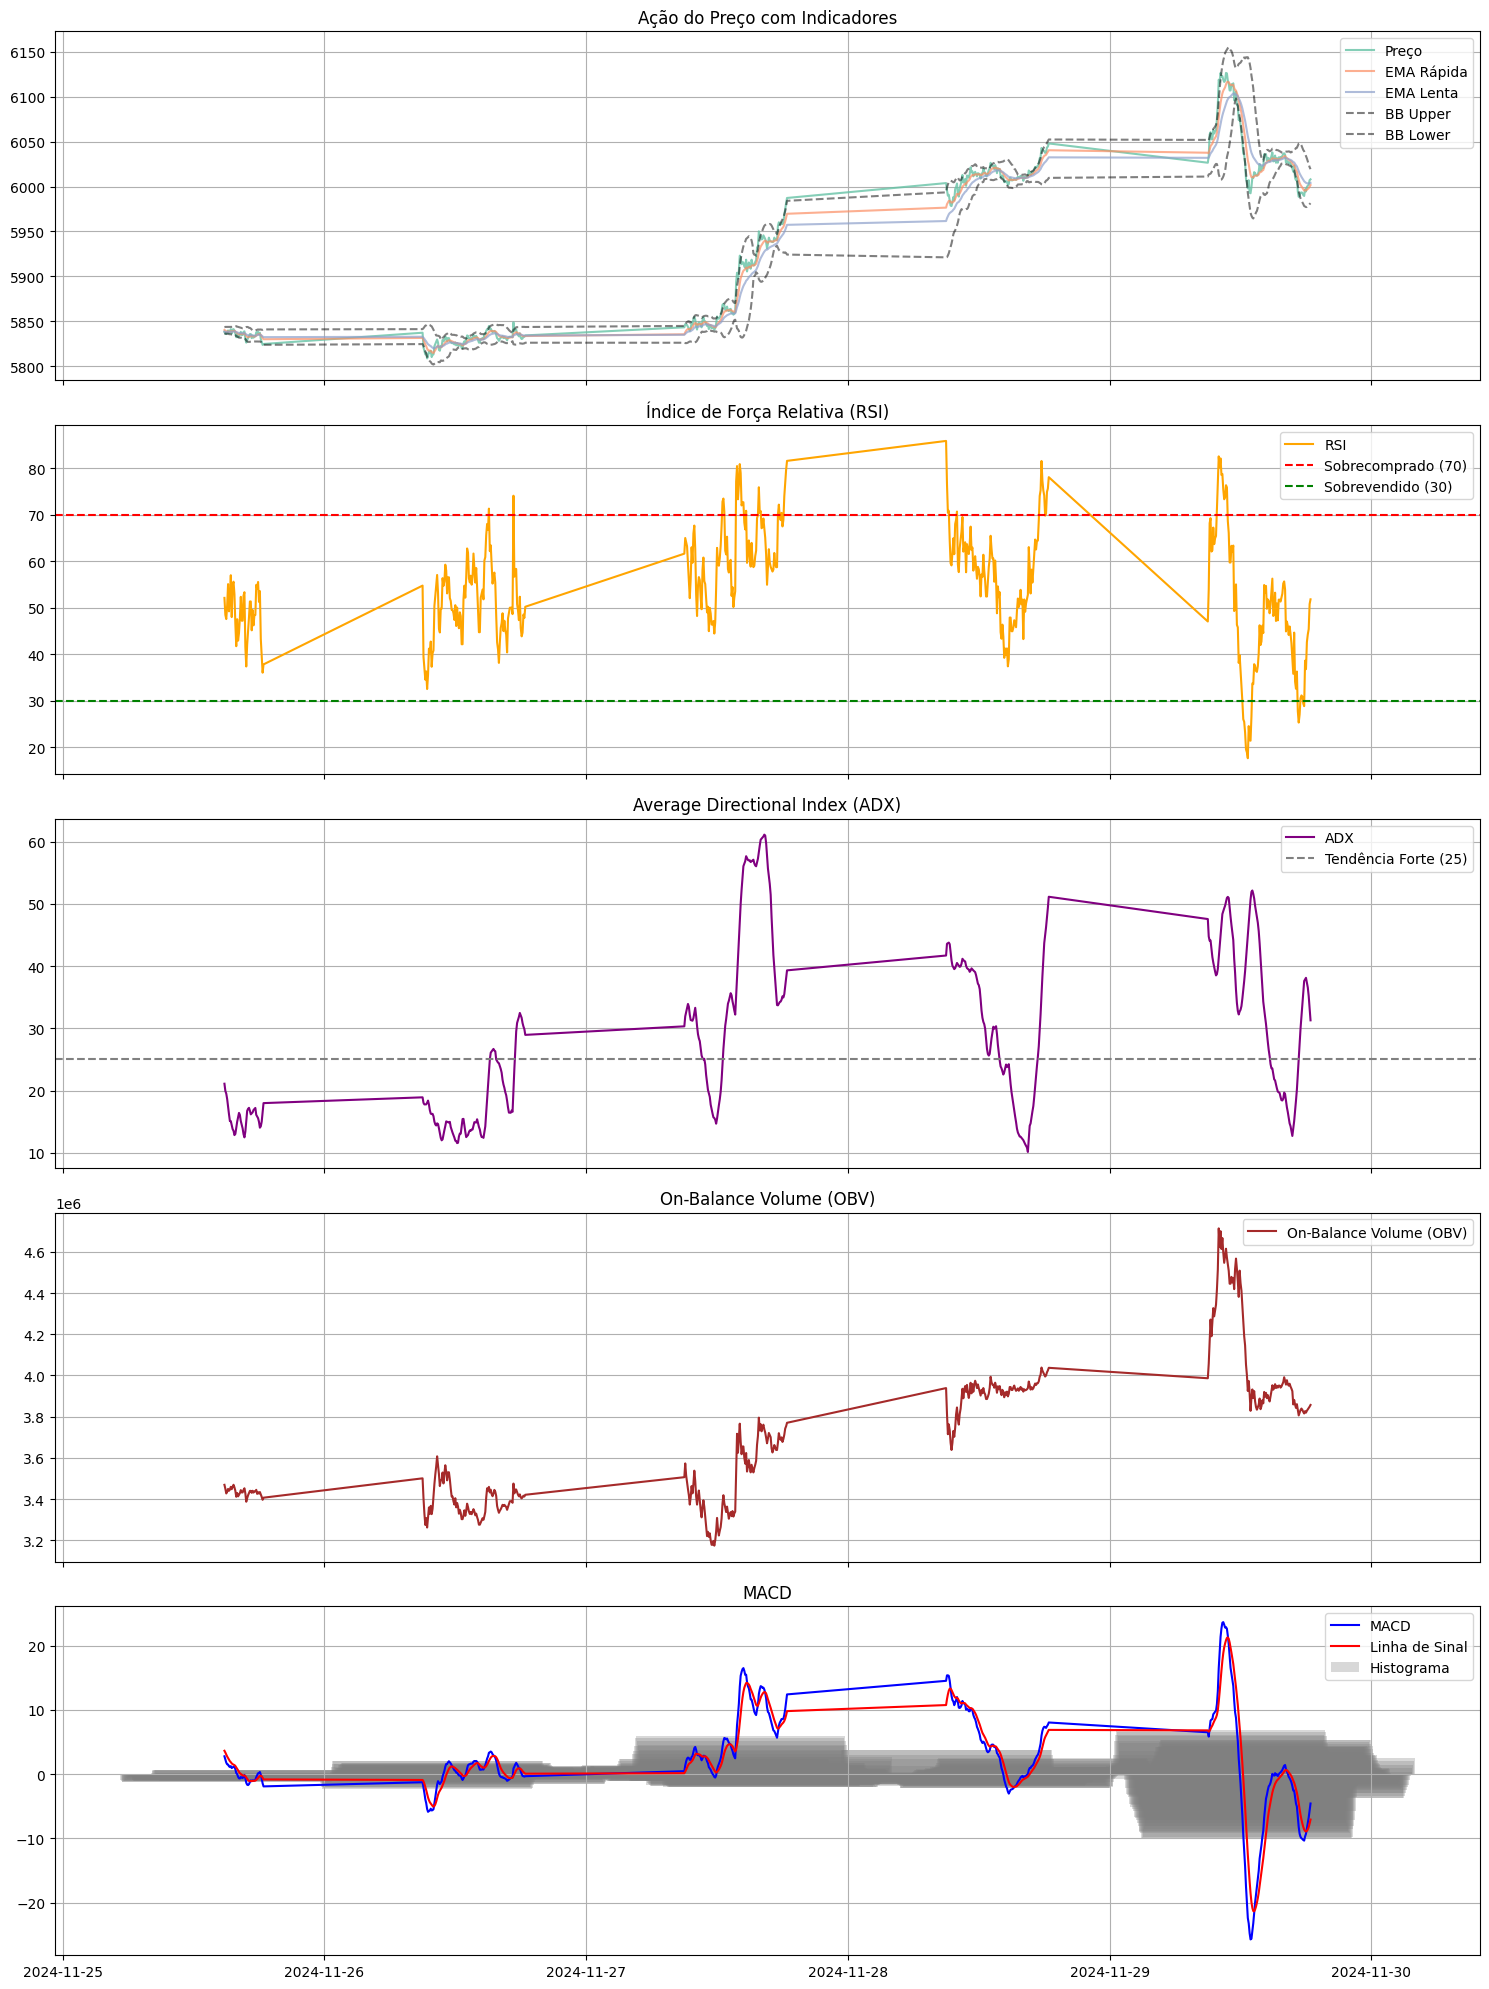

In [5]:
def plot_price_and_indicators(df, window=500):
    """Plot comprehensive price and indicator analysis."""
    recent = df.tail(window)
    
    # Criar figura com subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
    
    # 1. Preço e Médias Móveis Exponenciais
    ax1 = axes[0]
    ax1.plot(recent.index, recent['close'], label='Preço', alpha=0.8)
    ax1.plot(recent.index, recent['ema_fast'], label='EMA Rápida', alpha=0.7)
    ax1.plot(recent.index, recent['ema_slow'], label='EMA Lenta', alpha=0.7)
    ax1.plot(recent.index, recent['bb_upper'], 'k--', label='BB Upper', alpha=0.5)
    ax1.plot(recent.index, recent['bb_lower'], 'k--', label='BB Lower', alpha=0.5)
    ax1.set_title('Ação do Preço com Indicadores')
    ax1.legend()
    ax1.grid(True)
    
    # 2. RSI
    ax2 = axes[1]
    ax2.plot(recent.index, recent['rsi'], label='RSI', color='orange')
    ax2.axhline(y=70, color='r', linestyle='--', label='Sobrecomprado (70)')
    ax2.axhline(y=30, color='g', linestyle='--', label='Sobrevendido (30)')
    ax2.set_title('Índice de Força Relativa (RSI)')
    ax2.legend()
    ax2.grid(True)
    
    # 3. ADX
    ax3 = axes[2]
    ax3.plot(recent.index, recent['adx'], label='ADX', color='purple')
    ax3.axhline(y=25, color='grey', linestyle='--', label='Tendência Forte (25)')
    ax3.set_title('Average Directional Index (ADX)')
    ax3.legend()
    ax3.grid(True)
    
    # 4. OBV
    ax4 = axes[3]
    ax4.plot(recent.index, recent['obv'], label='On-Balance Volume (OBV)', color='brown')
    ax4.set_title('On-Balance Volume (OBV)')
    ax4.legend()
    ax4.grid(True)
    
    # 5. MACD
    ax5 = axes[4]
    ax5.plot(recent.index, recent['macd'], label='MACD', color='blue')
    ax5.plot(recent.index, recent['macd_signal'], label='Linha de Sinal', color='red')
    ax5.bar(recent.index, recent['macd_hist'], alpha=0.3, label='Histograma', color='grey')
    ax5.set_title('MACD')
    ax5.legend()
    ax5.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plotar a análise
plot_price_and_indicators(analysis)

## 4. Analyze Potential Trading Signals

c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\analysis\technical\strategy.py:184: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'buy_score'] = buy_score
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\analysis\technical\strategy.py:185: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'sell_score'] = sell_score
c:\Users\rlcp0\AI Office\mini-dolar-strategy-v4\notebooks\..\src\analysis\technical\strategy.py:205: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['final_signal'] = df['final_signal'].replace(to_replace=0, 

Signal Distribution:
Buy signals (1): 7301
Sell signals (-1): 6313
Neutral (0): 169

Signal Transitions:
final_signal
 0.0    13136
-2.0      309
 2.0      308
 1.0       16
-1.0       13
Name: count, dtype: int64


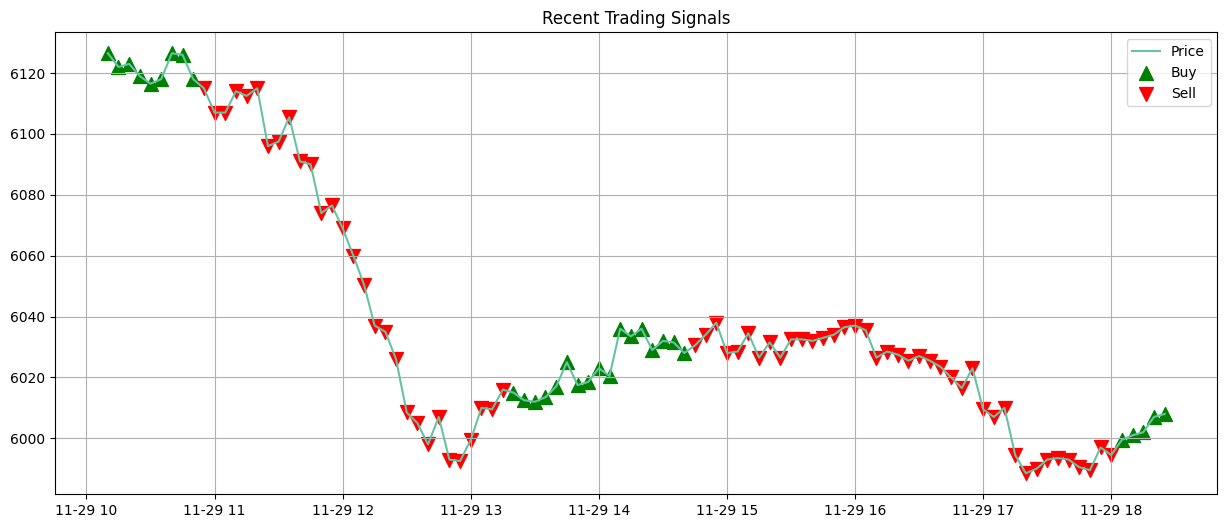

In [6]:
# Generate trading signals
signals = strategy.generate_signals(analysis)

def analyze_trading_signals(df):
    """Analyze generated trading signals."""
    # Count signals
    signal_counts = df['final_signal'].value_counts()
    print("Signal Distribution:")
    print(f"Buy signals (1): {signal_counts.get(1, 0)}")
    print(f"Sell signals (-1): {signal_counts.get(-1, 0)}")
    print(f"Neutral (0): {signal_counts.get(0, 0)}\n")
    
    # Signal transitions
    transitions = df['final_signal'].diff().value_counts()
    print("Signal Transitions:")
    print(transitions)

# Analyze signals
analyze_trading_signals(signals)

# Plot recent signals
recent = signals.tail(100)
plt.figure(figsize=(15, 6))
plt.plot(recent.index, recent['close'], label='Price')
plt.scatter(recent[recent['final_signal'] == 1].index, \
            recent[recent['final_signal'] == 1]['close'],
            marker='^', c='g', s=100, label='Buy')
plt.scatter(recent[recent['final_signal'] == -1].index,
            recent[recent['final_signal'] == -1]['close'],
            marker='v', c='r', s=100, label='Sell')
plt.title('Recent Trading Signals')
plt.legend()
plt.grid(True)
plt.show()